# Practical no 8 : Aim: Forecasting using ARIMA model
Time Series Forecasting With ARIMA Model in Python for Temperature Prediction.

In [1]:
import pandas as pd
df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


<Axes: xlabel='DATE'>

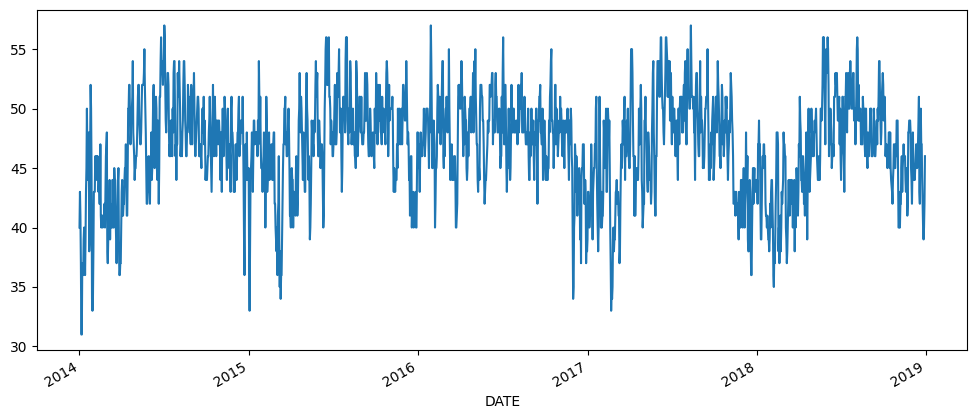

In [2]:
df['AvgTemp'].plot(figsize=(12,5))

In [3]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.67593748019965e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [4]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit=auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.761, Time=2.64 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.69 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.122, Time=3.05 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.377, Time=2.96 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=2.95 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=3.66 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.278, Time=3.80 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.819, Time=4.32 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.076, Time=4.18 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.701
Date:                Wed, 16 Apr 2025   AIC                           8295.401
Time:                        13:34:56   BIC                           8339.458
Sample:                             0   HQIC                          8311.655
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3077      0.383      3.414      0.001       0.557       2.058
ar.L1          0.9719      0.008    117.810      0.000       0.956       0.988
ma.L1         -0.1264      0.024     -5.318      0.000      -0.173      -0.080
ma.L2         -0.2161      0.024     -8.923      0.000      -0.264      -0.169
ma.L3         -0.2039      0.024     -8.522      0.000      -0.251      -0.157
ma.L4         -0.1371      0.023     -6.026      0.000      -0.182      -0.093
ma.L5         -0.0455      0.024     -1.868      0.062      -0.093       0.002
sigma2         5.4857      0.171     32.021      0.000       5.150       5.821
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                20.94
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [6]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Wed, 16 Apr 2025   AIC                           8156.395
Time:                        13:34:58   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721546
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894467
1799    45.904417
1800    45.914225
1801    45.923892
1802    45.933419
1803    45.942809
1804    45.952064
1805    45.961185
1806    45.970176
1807    45.979037
1808    45.987770
1809    45.996377
1810    46.004861
1811    46.013223
1812    46.021464
1813    46.029586
1814    46.037592
1815    46.045482
1816    46.053258
1817    46.060923
1818    46.068477
1819    46.075923
1820    46.083261
Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='DATE'>

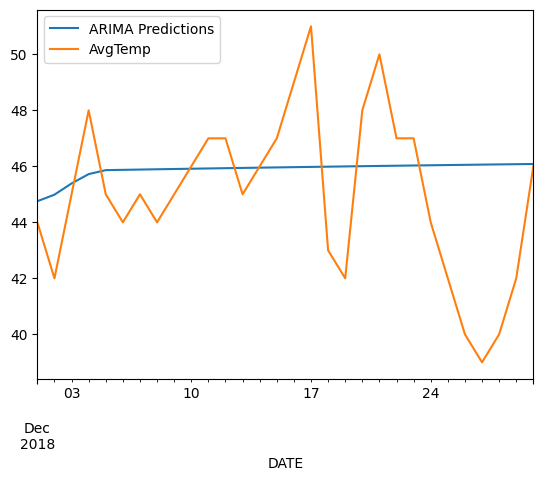

In [7]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)
pred.index=df.index[start:end+1]
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463972966616
